In [1]:
import pickle
import random
import inspect

import pygsti
import numpy as np
import networkx as nx
from numpy import pi, sin, cos, tan, arcsin, arccos, arctan2, sqrt, exp
from token_id import token_id
import matplotlib.pyplot as plt
from matplotlib import cm, colors

#from qiskit_ibm_runtime.fake_provider import FakeTorino
#from qiskit.providers.fake_provider import GenericBackendV2
#from qiskit1_start import *
#from crosstalk_tomography import *

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
hub = "ibm-q-melbourne"
group = "unimelb"
project = "hub"
backend_name = 'ibm_torino'
hgp = f"{hub}/{group}/{project}"

#service = Runtime_startup()

#QiskitRuntimeService.save_account(token=token_id, channel='ibm_quantum')
service = QiskitRuntimeService()
backend = service.backend('ibm_torino', instance=hgp)

RequestsApiError: '403 Client Error: Forbidden for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Your IBM Quantum account has been disabled. Learn more: https://ibm.biz/BdfaME., Error code: 3485.'

In [17]:
backend.service.job()

TypeError: QiskitRuntimeService.job() missing 1 required positional argument: 'job_id'

In [2]:
hub = "ibm-q-melbourne"
group = "unimelb"
project = "hub"
backend_name = 'ibm_torino'
hgp = f"{hub}/{group}/{project}"

provider = IBM_startup()
backend = provider.get_backend(backend_name, instance=hgp)
#backend = FakeTorino()
#backend = GenericBackendV2(num_qubits=6)
print(backend)

Account enabled
<IBMBackend('ibm_torino')>


In [ ]:
from free_entanglebase import Free_EntangleBase
test = Free_EntangleBase(backend, qubits_to_connect=list(range(133)))

In [3]:
schedule_jobs(backend, 'cz', qrem=True)

30 Aug 2024 15:37:28: circuit generation started
30 Aug 2024 15:37:28: pygsti phase complete
30 Aug 2024 15:38:03: circuit mapping complete
[[(114, 129), <IBMCircuitJob('cv8nngykfn8g008vpr60')>, <IBMCircuitJob('cv8nnje8gpc0008gfac0')>, <IBMCircuitJob('cv8nnk6m2bgg008km7f0')>], ['qrem', <IBMCircuitJob('cv8nnmy8gpc0008gfacg')>]]


In [4]:
with open(f"ibm_torino/cz/jobs_20240830_1537.pkl", "rb") as f:
    jobs = dict(pickle.load(f))

print(jobs)

{(114, 129): ['cv8nngykfn8g008vpr60', 'cv8nnje8gpc0008gfac0', 'cv8nnk6m2bgg008km7f0'], 'qrem': ['cv8nnmy8gpc0008gfacg']}


In [4]:
#20240822_2110 for [0,1,3,5] test
#20240823_1149 for [0,1,33,127] test
#20240823_1530 for [0,1,2,3,16,35,44,55,74,94,127] (barrier not extended to all qubits)
#20240823_2356 for [114,129,29,46,48,63,65,80,82,97,99]

#20240830_1535 for [0,1,2,3,16,35,44,55,74,94,127] (pure IDT without cz)
#20240830_1537 for [114,129,29,46,48,63,65,80,82,97,99] (pure IDT without cz)


analyse_results(backend, 'cz', '20240830_1537', [(114,129)], qrem=True)
#noise_dict = prepare_cnot_error_dict(0, 1, backend, 'cz', '20240821_2233')

In [3]:
with open(f"ibm_torino/cz/noise_dict_20240823_1530.pkl", "rb") as f:
    noise_dict_1 = dict(pickle.load(f))

with open(f"ibm_torino/cz/noise_dict_20240823_2356.pkl", "rb") as f:
    noise_dict_2 = dict(pickle.load(f))

error_dict = noise_dict_1|noise_dict_2
print(error_dict)

with open(f"ibm_torino/cz/noise_dict_20240830_1535.pkl", "rb") as f:
    noise_dict_1 = dict(pickle.load(f))

with open(f"ibm_torino/cz/noise_dict_20240830_1537.pkl", "rb") as f:
    noise_dict_2 = dict(pickle.load(f))

error_dict2 = noise_dict_1|noise_dict_2
print(error_dict2)

{('Gcz', 0, 1): {'SX:2': -9.943402176306361e-05, 'SY:2': -4.7682872948688496e-05, 'SZ:2': 0.00012000983954526162, 'SX:3': 7.891393280121581e-05, 'SY:3': -8.709657859365941e-05, 'SZ:3': 0.00022795957633411917, 'SX:16': -0.00014308756449041897, 'SY:16': -0.00015063792164396973, 'SZ:16': 0.00040653920118418463, 'SX:35': 0.00010406353913478656, 'SY:35': 3.0485969741608964e-05, 'SZ:35': 0.0009303650421392172, 'SX:44': -0.0004548714269167996, 'SY:44': -0.00022877144097222204, 'SZ:44': 0.0005120289476915563, 'SX:55': 0.00018621697286124906, 'SY:55': 7.158295987694019e-05, 'SZ:55': 0.0005498301246697683, 'SX:74': 7.739695234395145e-05, 'SY:74': 0.00010104262889114272, 'SZ:74': 0.00025205219848231506, 'SX:94': 7.73041712791755e-05, 'SY:94': 0.00019599960799565375, 'SZ:94': 0.0015684592849115472, 'SX:127': 0.0002879654000741021, 'SY:127': 0.000202786886510695, 'SZ:127': 0.0003429983349480374, 'SXX:2,3': -1.1477888350615663e-06, 'SXY:2,3': -7.230927747507752e-05, 'SXZ:2,3': 0.0002122158963511654,

In [4]:
error_dict2

{('Gcz', 0, 1): {'SX:2': -0.0002816519321240426,
  'SY:2': 2.3394171436417674e-05,
  'SZ:2': -0.0004334049335704864,
  'SX:3': -0.00011840993140756071,
  'SY:3': -5.2240769029988834e-05,
  'SZ:3': 0.00020938453417062458,
  'SX:16': -4.485543326666007e-05,
  'SY:16': -0.00020191786984747836,
  'SZ:16': 0.0005895278786251577,
  'SX:35': 9.410995951504977e-05,
  'SY:35': 8.252671158664475e-05,
  'SZ:35': 0.0007687527704738005,
  'SX:44': -6.129887066249716e-05,
  'SY:44': -0.00026133211982069733,
  'SZ:44': 0.00033533081491825766,
  'SX:55': 2.860928543365704e-05,
  'SY:55': 0.00022424198279753375,
  'SZ:55': 0.0005569051771416437,
  'SX:74': 2.789394208551073e-06,
  'SY:74': 0.00012941240607434383,
  'SZ:74': 0.0020921041669228375,
  'SX:94': 0.00030318410370282494,
  'SY:94': 0.00023382203446371136,
  'SZ:94': 0.0021377877468852025,
  'SX:127': -4.114112590586927e-06,
  'SY:127': -0.00024193540363548092,
  'SZ:127': 0.0006245815461198806,
  'SXX:2,3': -5.6686860642353546e-05,
  'SXY:2,3

In [4]:
from numpy.linalg import norm
from free_entanglebase import Free_EntangleBase
from ibm_torino_edges import edge_list
#path = "ibm_torino/cz/noise_dict_20240823_1530.pkl"
#with open(path, "rb") as f:
#    error_dict = pickle.load(f)

#benchmark_qubits = [0,1,2,3,16,35,44,55,74,94,127]
#benchmark_qubits = [0,1,2,3,16,35,44,55,74,94,127] + [114,129,29,46,48,63,65,80,82,97,99]
benchmark_qubits = {('Gcz',0,1): [0,1,2,3,16,35,44,55,74,94,127], ('Gcz',114,129): [114,129,29,46,48,63,65,80,82,97,99]}

#device_properties = Free_EntangleBase(backend, list(range(133)))
#graph = nx.from_edgelist(device_properties.edge_list)
graph = nx.from_edgelist(edge_list)
H_single_distances = {}
#H_double_distances = {i: [] for i in range(1, 12)}
S_single_distances = {}
#S_double_distances = {i: [] for i in range(1, 12)}
A_single_distances = {}
#A_double_distances = {i: [] for i in range(1, 12)}
H_double_distances = {}
S_double_distances = {}
A_double_distances = {}

error_dict_new = {gate: {q:{} for q in benchmark_qubits[gate] if q not in gate}|{(q1, q2):{} for q1 in benchmark_qubits[gate] for q2 in benchmark_qubits[gate] if q2>q1 and (q1 not in gate) and (q2 not in gate)} 
                  for gate in error_dict.keys()}
print(error_dict_new)
for gate, error_params in error_dict.items():
    for error_name, error_rate in error_params.items():
        error_type = error_name.split(':')[0]
        error_targets = error_name.split(':')[1]
        
        if len(error_type) == 2:
            error_dict_new[gate][int(error_targets)][error_type] = error_rate
        
        else:
            error_targets = (int(error_targets.split(',')[0]), int(error_targets.split(',')[1]))
            error_dict_new[gate][error_targets][error_type] = error_rate
            
#error_dict_new = {('Gcnot',0,1): error_dict_new[('Gcnot',0,1)]}
print(error_dict_new)

for gate, targets_dict in error_dict_new.items():
    for targets, error_params_dict in targets_dict.items():
        #print(type(targets) is int)
        if type(targets) is int:
            H_single = []
            S_single = []
            A_single = []
            distance = min(nx.shortest_path_length(graph, gate[1], targets), nx.shortest_path_length(graph, gate[2], targets))
            for error_param, error_rate in error_params_dict.items():
                if error_param[0] == 'H':
                    H_single.append(error_rate)
                elif error_param[0] == 'S':
                    S_single.append(error_rate)
                else:
                    A_single.append(error_rate)
            if distance in H_single_distances.keys():
                H_single_distances[distance].append(norm(H_single))
            else:
                H_single_distances[distance] = [norm(H_single)]
            if distance in S_single_distances.keys():
                S_single_distances[distance].append(norm(S_single))
            else:
                S_single_distances[distance] = [norm(S_single)]
            if distance in A_single_distances.keys():
                A_single_distances[distance].append(norm(A_single))
            else:
                A_single_distances[distance] = [norm(A_single)]
            
        else:
            H_double = []
            S_double = []
            A_double = []
            #distance = min(nx.shortest_path_length(graph, gate[1], targets[0]), nx.shortest_path_length(graph, gate[2], targets[0]),
            #               nx.shortest_path_length(graph, gate[1], targets[1]), nx.shortest_path_length(graph, gate[2], targets[1]))
            
            distance = min(nx.shortest_path_length(graph, gate[1], targets[0]), nx.shortest_path_length(graph, gate[2], targets[0]),
                           nx.shortest_path_length(graph, gate[1], targets[1]), nx.shortest_path_length(graph, gate[2], targets[1]))*nx.shortest_path_length(graph, targets[0], targets[1])
            #distance = nx.shortest_path_length(graph, targets[0], targets[1])
            for error_param, error_rate in error_params_dict.items():
                if error_param[0] == 'H':
                    H_double.append(error_rate)
                elif error_param[0] == 'S':
                    S_double.append(error_rate)
                else:
                    A_double.append(error_rate)
            if distance in H_double_distances.keys():
                H_double_distances[distance].append(norm(H_double))
            else:
                H_double_distances[distance] = [norm(H_double)]
            if distance in S_double_distances.keys():
                S_double_distances[distance].append(norm(S_double))
            else:
                S_double_distances[distance] = [norm(S_double)]
            if distance in A_double_distances.keys():
                A_double_distances[distance].append(norm(A_double))
            else:
                A_double_distances[distance] = [norm(A_double)]

{('Gcz', 0, 1): {2: {}, 3: {}, 16: {}, 35: {}, 44: {}, 55: {}, 74: {}, 94: {}, 127: {}, (2, 3): {}, (2, 16): {}, (2, 35): {}, (2, 44): {}, (2, 55): {}, (2, 74): {}, (2, 94): {}, (2, 127): {}, (3, 16): {}, (3, 35): {}, (3, 44): {}, (3, 55): {}, (3, 74): {}, (3, 94): {}, (3, 127): {}, (16, 35): {}, (16, 44): {}, (16, 55): {}, (16, 74): {}, (16, 94): {}, (16, 127): {}, (35, 44): {}, (35, 55): {}, (35, 74): {}, (35, 94): {}, (35, 127): {}, (44, 55): {}, (44, 74): {}, (44, 94): {}, (44, 127): {}, (55, 74): {}, (55, 94): {}, (55, 127): {}, (74, 94): {}, (74, 127): {}, (94, 127): {}}, ('Gcz', 114, 129): {29: {}, 46: {}, 48: {}, 63: {}, 65: {}, 80: {}, 82: {}, 97: {}, 99: {}, (29, 46): {}, (29, 48): {}, (29, 63): {}, (29, 65): {}, (29, 80): {}, (29, 82): {}, (29, 97): {}, (29, 99): {}, (46, 48): {}, (46, 63): {}, (46, 65): {}, (46, 80): {}, (46, 82): {}, (46, 97): {}, (46, 99): {}, (48, 63): {}, (48, 65): {}, (48, 80): {}, (48, 82): {}, (48, 97): {}, (48, 99): {}, (63, 65): {}, (63, 80): {}, (

In [10]:
print(H_single_distances)

{1: [0.006975921889607078], 2: [0.002860742136133318], 4: [0.002376601593817997, 0.005593272241012519], 8: [0.005280807376524997, 0.005465444436790084], 9: [0.006225664489201254], 12: [0.005923658859831522, 0.005617445465745302], 16: [0.0011845848014189612, 0.005379813314727489], 20: [0.0034974891411057247, 0.005227509710748108], 25: [0.006418963546340697], 18: [0.0025523397052393815], 14: [0.0058948160201898045], 10: [0.004671148558146459], 6: [0.002572275766027317]}


In [6]:
from numpy.linalg import norm
from free_entanglebase import Free_EntangleBase
from ibm_torino_edges import edge_list
#path = "ibm_torino/cz/noise_dict_20240823_1530.pkl"
#with open(path, "rb") as f:
#    error_dict = pickle.load(f)

#benchmark_qubits = [0,1,2,3,16,35,44,55,74,94,127]
#benchmark_qubits = [0,1,2,3,16,35,44,55,74,94,127] + [114,129,29,46,48,63,65,80,82,97,99]
benchmark_qubits = {('Gcz',0,1): [0,1,2,3,16,35,44,55,74,94,127], ('Gcz',114,129): [114,129,29,46,48,63,65,80,82,97,99]}
#device_properties = Free_EntangleBase(backend, list(range(133)))
#graph = nx.from_edgelist(device_properties.edge_list)
graph = nx.from_edgelist(edge_list)

H_single_distances2 = {}
#H_double_distances = {i: [] for i in range(1, 12)}
S_single_distances2 = {}
#S_double_distances = {i: [] for i in range(1, 12)}
A_single_distances2 = {}
#A_double_distances = {i: [] for i in range(1, 12)}
H_double_distances2 = {}
S_double_distances2 = {}
A_double_distances2 = {}

error_dict_new = {gate: {q:{} for q in benchmark_qubits[gate] if q not in gate}|{(q1, q2):{} for q1 in benchmark_qubits[gate] for q2 in benchmark_qubits[gate] if q2>q1 and (q1 not in gate) and (q2 not in gate)} 
                  for gate in error_dict2.keys()}

for gate, error_params in error_dict2.items():
    for error_name, error_rate in error_params.items():
        error_type = error_name.split(':')[0]
        error_targets = error_name.split(':')[1]
        
        if len(error_type) == 2:
            error_dict_new[gate][int(error_targets)][error_type] = error_rate
        
        else:
            error_targets = (int(error_targets.split(',')[0]), int(error_targets.split(',')[1]))
            error_dict_new[gate][error_targets][error_type] = error_rate
            
#error_dict_new = {('Gcnot',0,1): error_dict_new[('Gcnot',0,1)]}
print(error_dict_new)

for gate, targets_dict in error_dict_new.items():
    for targets, error_params_dict in targets_dict.items():
        if type(targets) is int:
            H_single = []
            S_single = []
            A_single = []
            distance = min(nx.shortest_path_length(graph, gate[1], targets), nx.shortest_path_length(graph, gate[2], targets))
            for error_param, error_rate in error_params_dict.items():
                if error_param[0] == 'H':
                    H_single.append(error_rate)
                elif error_param[0] == 'S':
                    S_single.append(error_rate)
                else:
                    A_single.append(error_rate)
            if distance in H_single_distances2.keys():
                H_single_distances2[distance].append(norm(H_single))
            else:
                H_single_distances2[distance] = [norm(H_single)]
            if distance in S_single_distances2.keys():
                S_single_distances2[distance].append(norm(S_single))
            else:
                S_single_distances2[distance] = [norm(S_single)]
            if distance in A_single_distances2.keys():
                A_single_distances2[distance].append(norm(A_single))
            else:
                A_single_distances2[distance] = [norm(A_single)]
            
        else:
            H_double = []
            S_double = []
            A_double = []
            #distance = min(nx.shortest_path_length(graph, gate[1], targets[0]), nx.shortest_path_length(graph, gate[2], targets[0]),
            #               nx.shortest_path_length(graph, gate[1], targets[1]), nx.shortest_path_length(graph, gate[2], targets[1]))
            
            distance = min(nx.shortest_path_length(graph, gate[1], targets[0]), nx.shortest_path_length(graph, gate[2], targets[0]),
                           nx.shortest_path_length(graph, gate[1], targets[1]), nx.shortest_path_length(graph, gate[2], targets[1]))*nx.shortest_path_length(graph, targets[0], targets[1])
            #distance = nx.shortest_path_length(graph, targets[0], targets[1])
            for error_param, error_rate in error_params_dict.items():
                if error_param[0] == 'H':
                    H_double.append(error_rate)
                elif error_param[0] == 'S':
                    S_double.append(error_rate)
                else:
                    A_double.append(error_rate)
            if distance in H_double_distances2.keys():
                H_double_distances2[distance].append(norm(H_double))
            else:
                H_double_distances2[distance] = [norm(H_double)]
            if distance in S_double_distances2.keys():
                S_double_distances2[distance].append(norm(S_double))
            else:
                S_double_distances2[distance] = [norm(S_double)]
            if distance in A_double_distances2.keys():
                A_double_distances2[distance].append(norm(A_double))
            else:
                A_double_distances2[distance] = [norm(A_double)]

{('Gcz', 0, 1): {2: {'SX': -0.0002816519321240426, 'SY': 2.3394171436417674e-05, 'SZ': -0.0004334049335704864, 'AX': -0.00012058829165815076, 'AY': 0.00010822367618448163, 'AZ': 0.0001330112145814026, 'HX': 0.0017587410734022598, 'HY': 0.003331041102351334, 'HZ': 0.0006357095248088672}, 3: {'SX': -0.00011840993140756071, 'SY': -5.2240769029988834e-05, 'SZ': 0.00020938453417062458, 'AX': 0.00019419855999282102, 'AY': -0.00020278421170886153, 'AZ': 0.0002277118918116271, 'HX': 0.0016494654388320368, 'HY': -0.0010136416340610246, 'HZ': 0.0002893138831257504}, 16: {'SX': -4.485543326666007e-05, 'SY': -0.00020191786984747836, 'SZ': 0.0005895278786251577, 'AX': 0.00030422806462036166, 'AY': -0.0002932814370982128, 'AZ': 0.0002402309516549614, 'HX': -0.0024046796097234335, 'HY': -0.0001293925167352686, 'HZ': -0.0045659058411522905}, 35: {'SX': 9.410995951504977e-05, 'SY': 8.252671158664475e-05, 'SZ': 0.0007687527704738005, 'AX': 0.00034205018649688157, 'AY': -0.0004106132458363736, 'AZ': 0.00

In [9]:
print(error_dict_new)

{('Gcz', 0, 1): {2: {'SX': -0.0002816519321240426, 'SY': 2.3394171436417674e-05, 'SZ': -0.0004334049335704864, 'AX': -0.00012058829165815076, 'AY': 0.00010822367618448163, 'AZ': 0.0001330112145814026, 'HX': 0.0017587410734022598, 'HY': 0.003331041102351334, 'HZ': 0.0006357095248088672}, 3: {'SX': -0.00011840993140756071, 'SY': -5.2240769029988834e-05, 'SZ': 0.00020938453417062458, 'AX': 0.00019419855999282102, 'AY': -0.00020278421170886153, 'AZ': 0.0002277118918116271, 'HX': 0.0016494654388320368, 'HY': -0.0010136416340610246, 'HZ': 0.0002893138831257504}, 16: {'SX': -4.485543326666007e-05, 'SY': -0.00020191786984747836, 'SZ': 0.0005895278786251577, 'AX': 0.00030422806462036166, 'AY': -0.0002932814370982128, 'AZ': 0.0002402309516549614, 'HX': -0.0024046796097234335, 'HY': -0.0001293925167352686, 'HZ': -0.0045659058411522905}, 35: {'SX': 9.410995951504977e-05, 'SY': 8.252671158664475e-05, 'SZ': 0.0007687527704738005, 'AX': 0.00034205018649688157, 'AY': -0.0004106132458363736, 'AZ': 0.00

In [18]:
basis_list = ['XX','XY','XZ','YX','YY','YZ','ZX','ZY','ZZ']
H_double_magnitudes = {basis: [] for basis in basis_list}


for noise_gate, error_param_dict in error_dict_new.items():
    print(error_param_dict)
    for q, error_param in error_param_dict.items():
        if isinstance(q, tuple):
            for error_type, rate in error_param.items():
                if error_type[0] == 'H':
                    H_double_magnitudes[error_type[1:]].append(rate)

for basis, list in H_double_magnitudes.items():
    print(np.mean(np.abs(list)))

{2: {'SX': -0.0002816519321240426, 'SY': 2.3394171436417674e-05, 'SZ': -0.0004334049335704864, 'AX': -0.00012058829165815076, 'AY': 0.00010822367618448163, 'AZ': 0.0001330112145814026, 'HX': 0.0017587410734022598, 'HY': 0.003331041102351334, 'HZ': 0.0006357095248088672}, 3: {'SX': -0.00011840993140756071, 'SY': -5.2240769029988834e-05, 'SZ': 0.00020938453417062458, 'AX': 0.00019419855999282102, 'AY': -0.00020278421170886153, 'AZ': 0.0002277118918116271, 'HX': 0.0016494654388320368, 'HY': -0.0010136416340610246, 'HZ': 0.0002893138831257504}, 16: {'SX': -4.485543326666007e-05, 'SY': -0.00020191786984747836, 'SZ': 0.0005895278786251577, 'AX': 0.00030422806462036166, 'AY': -0.0002932814370982128, 'AZ': 0.0002402309516549614, 'HX': -0.0024046796097234335, 'HY': -0.0001293925167352686, 'HZ': -0.0045659058411522905}, 35: {'SX': 9.410995951504977e-05, 'SY': 8.252671158664475e-05, 'SZ': 0.0007687527704738005, 'AX': 0.00034205018649688157, 'AY': -0.0004106132458363736, 'AZ': 0.000198826867556819

In [27]:
a = []
for distance, error_list in H_single_distances.items():
    a += error_list
    
print(np.mean(a))
print(np.std(a))

0.004651027725144889
0.00163932702279506


[(1, 0.006975921889607078, 0.0), (2, 0.002860742136133318, 0.0), (4, 0.003984936917415258, 0.002274529627474967), (6, 0.002572275766027317, 0.0), (8, 0.00537312590665754, 0.00013055811737179213), (9, 0.006225664489201254, 0.0), (10, 0.004671148558146459, 0.0), (12, 0.005770552162788412, 0.0002165255674485147), (14, 0.0058948160201898045, 0.0), (16, 0.003282199058073225, 0.0029664745303876177), (18, 0.0025523397052393815, 0.0), (20, 0.004362499425926916, 0.001223309276386343), (25, 0.006418963546340697, 0.0)]


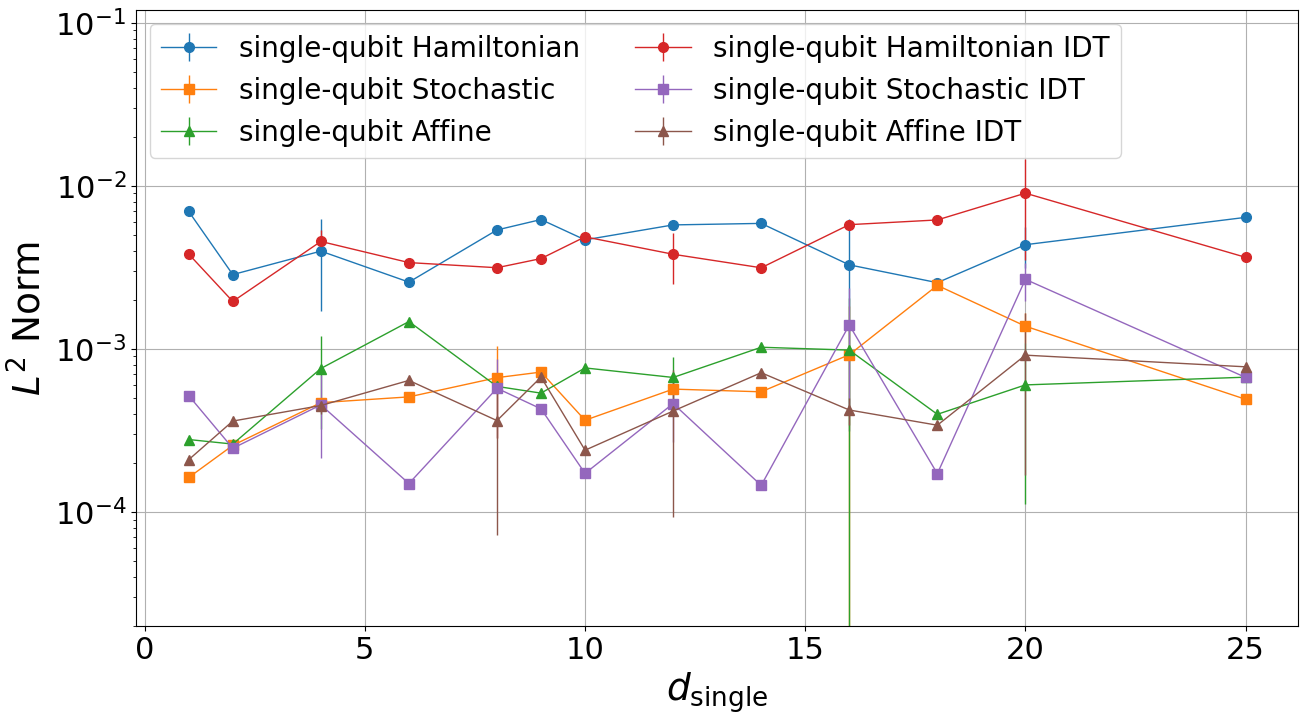

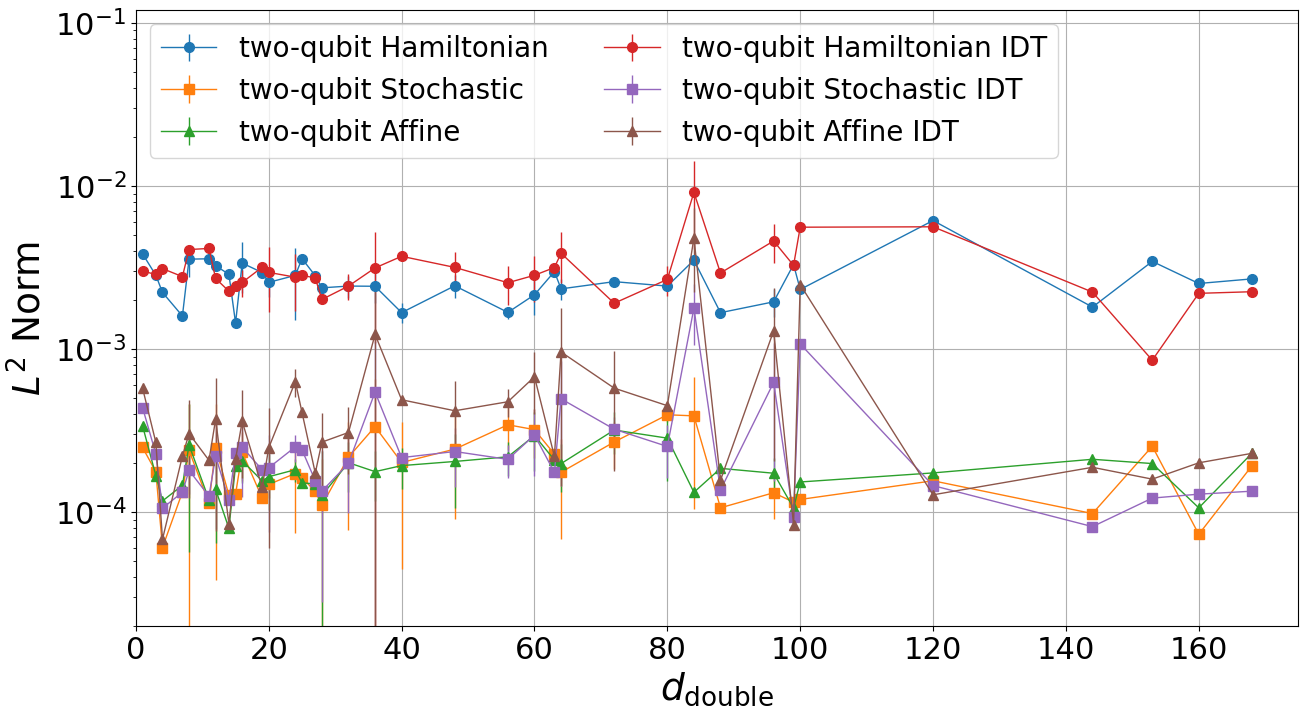

In [13]:
H_single_mean = []
H_double_mean = []
S_single_mean = []
S_double_mean = []
A_single_mean = []
A_double_mean = []
H_single_std = []
H_double_std = []
S_single_std = []
S_double_std = []
A_single_std = []
A_double_std = []

H_singles = []
H_doubles = []
S_singles = []
S_doubles = []
A_singles = []
A_doubles = []
#PRINT()

distances_H_single = list(H_single_distances.keys())
distances_S_single = list(S_single_distances.keys())
distances_A_single = list(A_single_distances.keys())
distances_H_double = list(H_double_distances.keys())
distances_S_double = list(S_double_distances.keys())
distances_A_double = list(A_double_distances.keys())

for distance, norm_list in H_single_distances.items():
    H_single_mean.append(np.mean(norm_list))
    H_single_std.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    H_singles.append(norm_list)
for distance, norm_list in H_double_distances.items():
    H_double_mean.append(np.mean(norm_list))
    H_double_std.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    H_doubles.append(norm_list)
for distance, norm_list in S_single_distances.items():
    S_single_mean.append(np.mean(norm_list))
    S_single_std.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    S_singles.append(norm_list)
for distance, norm_list in S_double_distances.items():
    S_double_mean.append(np.mean(norm_list))
    S_double_std.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    S_doubles.append(norm_list)
for distance, norm_list in A_single_distances.items():
    A_single_mean.append(np.mean(norm_list))
    A_single_std.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    A_singles.append(norm_list)
for distance, norm_list in A_double_distances.items():
    A_double_mean.append(np.mean(norm_list))
    A_double_std.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    A_doubles.append(norm_list)

H_single_sorted = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_H_single, H_single_mean, H_single_std), key=lambda pair: pair[0])]
H_double_sorted = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_H_double, H_double_mean, H_double_std), key=lambda pair: pair[0])]
S_single_sorted = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_S_single, S_single_mean, S_single_std), key=lambda pair: pair[0])]
S_double_sorted = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_S_double, S_double_mean, S_double_std), key=lambda pair: pair[0])]
A_single_sorted = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_A_single, A_single_mean, A_single_std), key=lambda pair: pair[0])]
A_double_sorted = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_A_double, A_double_mean, A_double_std), key=lambda pair: pair[0])]
print(H_single_sorted)

H_single_xy = [(distances_H_single[i], rate) for i in range(len(distances_H_single)) for rate in H_singles[i]]
S_single_xy = [(distances_S_single[i], rate) for i in range(len(distances_S_single)) for rate in S_singles[i]]
A_single_xy = [(distances_A_single[i], rate) for i in range(len(distances_A_single)) for rate in A_singles[i]]
H_double_xy = [(distances_H_double[i], rate) for i in range(len(distances_H_double)) for rate in H_doubles[i]]
S_double_xy = [(distances_S_double[i], rate) for i in range(len(distances_S_double)) for rate in S_doubles[i]]
A_double_xy = [(distances_A_double[i], rate) for i in range(len(distances_A_double)) for rate in A_doubles[i]]


H_single_mean2 = []
H_double_mean2 = []
S_single_mean2 = []
S_double_mean2 = []
A_single_mean2 = []
A_double_mean2 = []
H_single_std2 = []
H_double_std2 = []
S_single_std2 = []
S_double_std2 = []
A_single_std2 = []
A_double_std2 = []

H_singles2 = []
H_doubles2 = []
S_singles2 = []
S_doubles2 = []
A_singles2 = []
A_doubles2 = []
#PRINT()

distances_H_single2 = list(H_single_distances2.keys())
distances_S_single2 = list(S_single_distances2.keys())
distances_A_single2 = list(A_single_distances2.keys())
distances_H_double2 = list(H_double_distances2.keys())
distances_S_double2 = list(S_double_distances2.keys())
distances_A_double2 = list(A_double_distances2.keys())

for distance, norm_list in H_single_distances2.items():
    H_single_mean2.append(np.mean(norm_list))
    H_single_std2.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    H_singles2.append(norm_list)
for distance, norm_list in H_double_distances2.items():
    H_double_mean2.append(np.mean(norm_list))
    H_double_std2.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    H_doubles2.append(norm_list)
for distance, norm_list in S_single_distances2.items():
    S_single_mean2.append(np.mean(norm_list))
    S_single_std2.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    S_singles2.append(norm_list)
for distance, norm_list in S_double_distances2.items():
    S_double_mean2.append(np.mean(norm_list))
    S_double_std2.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    S_doubles2.append(norm_list)
for distance, norm_list in A_single_distances2.items():
    A_single_mean2.append(np.mean(norm_list))
    A_single_std2.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    A_singles2.append(norm_list)
for distance, norm_list in A_double_distances2.items():
    A_double_mean2.append(np.mean(norm_list))
    A_double_std2.append(np.std(norm_list)/np.sqrt(len(norm_list)))
    A_doubles2.append(norm_list)

H_single_sorted2 = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_H_single2, H_single_mean2, H_single_std2), key=lambda pair: pair[0])]
H_double_sorted2 = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_H_double2, H_double_mean2, H_double_std2), key=lambda pair: pair[0])]
S_single_sorted2 = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_S_single2, S_single_mean2, S_single_std2), key=lambda pair: pair[0])]
S_double_sorted2 = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_S_double2, S_double_mean2, S_double_std2), key=lambda pair: pair[0])]
A_single_sorted2 = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_A_single2, A_single_mean2, A_single_std2), key=lambda pair: pair[0])]
A_double_sorted2 = [(distance, mean, 2*std) for distance, mean, std in sorted(zip(distances_A_double2, A_double_mean2, A_double_std2), key=lambda pair: pair[0])]

H_single_xy2 = [(distances_H_single2[i], rate) for i in range(len(distances_H_single2)) for rate in H_singles2[i]]
S_single_xy2 = [(distances_S_single2[i], rate) for i in range(len(distances_S_single2)) for rate in S_singles2[i]]
A_single_xy2 = [(distances_A_single2[i], rate) for i in range(len(distances_A_single2)) for rate in A_singles2[i]]
H_double_xy2 = [(distances_H_double2[i], rate) for i in range(len(distances_H_double2)) for rate in H_doubles2[i]]
S_double_xy2 = [(distances_S_double2[i], rate) for i in range(len(distances_S_double2)) for rate in S_doubles2[i]]
A_double_xy2 = [(distances_A_double2[i], rate) for i in range(len(distances_A_double2)) for rate in A_doubles2[i]]

#plt.style.use('classic')
fig, ax = plt.subplots(figsize = (15,8))
fig2, ax2 = plt.subplots(figsize = (15,8))
#ax.errorbar(distances_H_single, H_single_mean, yerr=2*np.array(H_single_std), label='single-qubit Hamiltonian', marker = 'o', fmt='o', linewidth=1, markersize=7)
#ax.errorbar(distances_S_single, S_single_mean, yerr=2*np.array(S_single_std), label='single-qubit Stochastic', marker = 's', fmt='o', linewidth=1, markersize=7)
#ax.errorbar(distances_A_single, A_single_mean, yerr=2*np.array(A_single_std), label='single-qubit Affine', marker = '^', fmt='o', linewidth=1, markersize=7)
#ax.errorbar(distances_H_single2, H_single_mean2, yerr=2*np.array(H_single_std2), label='single-qubit Hamiltonian IDT', marker = 'o', fmt='o', linewidth=1, markersize=7)
#ax.errorbar(distances_S_single2, S_single_mean2, yerr=2*np.array(S_single_std2), label='single-qubit Stochastic IDT', marker = 's', fmt='o', linewidth=1, markersize=7)
#ax.errorbar(distances_A_single2, A_single_mean2, yerr=2*np.array(A_single_std2), label='single-qubit Affine IDT', marker = '^', fmt='o', linewidth=1, markersize=7)

ax.errorbar(*zip(*H_single_sorted), label='single-qubit Hamiltonian', marker = 'o', linewidth=1, markersize=7)
ax.errorbar(*zip(*S_single_sorted), label='single-qubit Stochastic', marker = 's', linewidth=1, markersize=7)
ax.errorbar(*zip(*A_single_sorted), label='single-qubit Affine', marker = '^', linewidth=1, markersize=7)
ax.errorbar(*zip(*H_single_sorted2), label='single-qubit Hamiltonian IDT', marker = 'o', linewidth=1, markersize=7)
ax.errorbar(*zip(*S_single_sorted2), label='single-qubit Stochastic IDT', marker = 's', linewidth=1, markersize=7)
ax.errorbar(*zip(*A_single_sorted2), label='single-qubit Affine IDT', marker = '^', linewidth=1, markersize=7)

#ax.scatter(*zip(*H_single_xy), label='single-qubit Hamiltonian', marker = 'o', s=20)
#ax.scatter(*zip(*S_single_xy), label='single-qubit Stochastic', marker = 's', s=20)
#ax.scatter(*zip(*A_single_xy), label='single-qubit Affine', marker = '^', s=20)
#ax.scatter(*zip(*H_single_xy2), label='single-qubit Hamiltonian IDT', marker = 'o', s=20)
#ax.scatter(*zip(*S_single_xy2), label='single-qubit Stochastic IDT', marker = 's', s=20)
#ax.scatter(*zip(*A_single_xy2), label='single-qubit Affine IDT', marker = '^', s=20)

#ax2.errorbar(distances_H_double, H_double_mean, yerr=2*np.array(H_double_std), label='two-qubit Hamiltonian', marker = 'o', linewidth=1, fmt='o', markersize=7)
#ax2.errorbar(distances_S_double, S_double_mean, yerr=2*np.array(S_double_std), label='two-qubit Stochastic', marker = 's', linewidth=1, fmt='o', markersize=7)
#ax2.errorbar(distances_A_double, A_double_mean, yerr=2*np.array(A_double_std), label='two-qubit Affine', marker = '^', linewidth=1, fmt='o', markersize=7)
#ax2.errorbar(distances_H_double2, H_double_mean2, yerr=2*np.array(H_double_std2), label='two-qubit Hamiltonian IDT', marker = 'o', linewidth=1, fmt='o', markersize=7)
#ax2.errorbar(distances_S_double2, S_double_mean2, yerr=2*np.array(S_double_std2), label='two-qubit Stochastic IDT', marker = 's', linewidth=1, fmt='o', markersize=7)
#ax2.errorbar(distances_A_double2, A_double_mean2, yerr=2*np.array(A_double_std2), label='two-qubit Affine IDT', marker = '^', linewidth=1, fmt='o', markersize=7)

ax2.errorbar(*zip(*H_double_sorted), label='two-qubit Hamiltonian', marker = 'o', linewidth=1, markersize=7)
ax2.errorbar(*zip(*S_double_sorted), label='two-qubit Stochastic', marker = 's', linewidth=1, markersize=7)
ax2.errorbar(*zip(*A_double_sorted), label='two-qubit Affine', marker = '^', linewidth=1, markersize=7)
ax2.errorbar(*zip(*H_double_sorted2), label='two-qubit Hamiltonian IDT', marker = 'o', linewidth=1, markersize=7)
ax2.errorbar(*zip(*S_double_sorted2), label='two-qubit Stochastic IDT', marker = 's', linewidth=1, markersize=7)
ax2.errorbar(*zip(*A_double_sorted2), label='two-qubit Affine IDT', marker = '^', linewidth=1, markersize=7)

#ax2.scatter(*zip(*H_double_xy), label='two-qubit Hamiltonian', marker = 'o', s=20)
#ax2.scatter(*zip(*S_double_xy), label='two-qubit Stochastic', marker = 's', s=20)
#ax2.scatter(*zip(*A_double_xy), label='two-qubit Affine', marker = '^')
#ax2.scatter(*zip(*H_double_xy2), label='two-qubit Hamiltonian IDT', marker = 'o', s=20)
#ax2.scatter(*zip(*S_double_xy2), label='two-qubit Stochastic IDT', marker = 's', s=20)
#ax2.scatter(*zip(*A_double_xy2), label='two-qubit Affine IDT', marker = '^', s=20)

ax.legend(fontsize=20,ncols=2,loc='upper left')
ax.grid()
#ax.set_xticks(list(range(1,grover_iterations+1)))
#ax.set_xlim(0, 12)
ax.set_ylim(2e-5, 0.12)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_yscale('log')
#ax.set_title('Single-qubit error parameters', fontsize=20)
ax.set_xlabel(r"$d_{\text{single}}$",fontsize=27)
ax.set_ylabel(r"$L^2$ Norm",fontsize=27)

ax2.legend(fontsize=20,ncols=2, loc='upper left')
ax2.grid()
#ax.set_xticks(list(range(1,grover_iterations+1)))
ax2.set_xlim(0, 175)
ax2.set_ylim(2e-5, 0.12)
ax2.tick_params(axis='both', which='major', labelsize=22)
ax2.set_yscale('log')
#ax2.set_title('Two-qubit error parameters', fontsize=20)
ax2.set_xlabel(r"$d_{\text{double}}$",fontsize=27)
ax2.set_ylabel(r"$L^2$ Norm",fontsize=27)
fig.savefig('C:/Users/k0426/Documents/PhD_Project/paper 1/torino HSA error parameters radii single.pdf', dpi=300, bbox_inches="tight")
fig2.savefig('C:/Users/k0426/Documents/PhD_Project/paper 1/torino HSA error parameters radii double.pdf', dpi=300, bbox_inches="tight")